<center> <h1>Universidad Nacional de San Agustín de Arequipa</h1> </center> 
<center> <h1>Facultad de Ingeniería de Producción y Servicios</h1> </center> 
<center> <h1>Escuela Profesional de Ingeniería de Telecomunicaciones</h1> </center> 

<center> <h1> </h1> </center> 

<center><img src="https://user-images.githubusercontent.com/19308295/115939517-f1c6fe80-a463-11eb-989c-812ab4942586.png" width="380" height="4200"></center>

<center> <h2>Ingeniero Renzo Bolivar - Docente DAIE</h2> </center> 

<center> <h1>Curso : Computación 2</h1> </center> 

<center> <h1>GRUPO 1</h1> </center> 

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

<center> <h1>MACHINE LEARNING</h1> </center> 
<center> <h1>K-MEANS: CALIDAD DE VINO</h1> </center> 

## Integrantes:

* Colque Apaza, Esmeralda Tatiana
* Espinoza Turpo, Yeferson Gustavo
* Hirpanoca Turpo, Gueyson
* Quispe Bejar, Jairo Jorge
* Valencia Solari, Saul Paolo
* Valdivia Aragon, Marco Andree

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

<img src='https://www.saborusa.com/wp-content/uploads/2019/10/Sabes-a-que-temperatura-se-disfruta-mejor-el-vino-Foto-destacada.png' width="800" height="100" />

## <font color=#14400C>****RESUMEN****<tfont>
## <font color=#14400C>****ESTADO DE SALUD Y LIMPIEZA****<tfont>
## <font color=#14400C>****ANÁLISIS EXPLORATORIO DE DATOS****<tfont>
## <font color=#14400C>****PREPARACIÓN DE DATOS****<tfont>
## <font color=#14400C>****APLICACIÓN DE MODELO****<tfont>
## <font color=#14400C>****RESULTADOS Y CONCLUCIONES****<tfont>

# <font color=#0C5C84>****1.RESUMEN****<tfont>

<div class="alert alert-success">
    En el presente informe de realizó la lectura, el tratamiento de datos, el análisis exploratorio (EDA) y por último, se hizo un estudio por modelado K-Means de un dataset que recoje información cuantitativa de las características importantes para la determinación entre 3 tipos de calidad de vino. El dataset conto con 178 muestras de vino de los cuales se realizó el estudio del modelo que incluye el estandarizado, el normalizado, escalado, normalizado l2 e isomapeo. Concluyendo que el estandarizado es el mejor método K-Means que se ajusta al Dataset. Los resultados arrojan porcentajes por encima del 80%, que indica un ajuste de calidad, salvo por el normalizado l2 que es ineficiente. 
</div


# <font color=#0C5C84>****2. ESTADO DE SALUD Y LIMPIEZA****<tfont>

<div class="alert alert-success">
    En este notebook se explicará una introducción a análisis exploratorio de datos con <strong>series temporales</strong> y visualización de datos en <strong>Pandas</strong>
</div>


## <font color=#0E0EC4>****2.1 Librerías y Dataset****<tfont>

In [1]:
#Se importan la librerias a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import missingno as msno
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler 
from funpymodeling.exploratory import freq_tbl, status, profiling_num
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
# Cargamos el Dataset con pandas y nombramos las columnas en names
df = pd.read_csv('data/Wine.csv',
                 names = ('class','Alcohol','Malic acid','Ash','Alcalinity of ash',
                                'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
                                'Proanthocyanins','Color intensity','Hue','OD','Proline')) 
df

class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue    OD  Proline  
0               5.64  1.04  3.92     1065  
1               4.38  1.05  3.40     1050  
2               5.68  1.03  3.17     1185  
3               7.80  0.86  3.45     1480  
4               4.32  1.04  2.93      735  
..               ...   ...   ...      ...  
173             7.70  0.64  1.74      740  
174             7.30  0.70  1.56      750  
175            10.20  0.59  1.56      835  
176             9.30  0.60  1.62      840  
177             9.20  0.61  1.60      560  

[178 rows x 14 columns]

## <font color=#0E0EC4>****2.2 Columnas****<tfont>

In [3]:
df.columns

Index(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'OD', 'Proline'],
      dtype='object')

*Alcohol:* El contenido de alcohol en el vino se refiere a la cantidad de etanol presente en la bebida. Es uno de los componentes más importantes del vino.

*Malic acid:* El ácido málico es uno de los ácidos orgánicos presentes en las uvas y, por lo tanto, en el mosto de vino. Aporta un sabor ácido y fresco al vino. 

*Ash:* La ceniza en el vino es el residuo mineral que queda después de quemar completamente la muestra de vino. 

*Alcalinity of ash:* La alcalinidad de la ceniza es una medida que indica la capacidad del vino para neutralizar ácidos. 

*Magnesium:* El magnesio es un mineral presente en el vino que puede afectar el perfil sensorial y las características organolépticas de la bebida.

*Total phenols:* Los fenoles son compuestos químicos que se encuentran en la piel y semillas de las uvas y se transfieren al vino durante la fermentación. Influyen en el color, sabor y estabilidad del vino.

*Flavanoids:* Los flavonoides son una clase específica de fenoles presentes en el vino. Son responsables del color y de algunos aromas del vino.

*Nonflavanoid phenols:* Los no flavonoides fenoles son otros compuestos fenólicos presentes en el vino, aparte de los flavonoides. Contribuyen a la complejidad y calidad del vino.

*Proanthocyanins:* Los proantocianidinas son una clase de polímeros de flavanoides que se encuentran en las uvas y en el vino. Contribuyen a la astringencia y estructura del vino.

*Color intensity:* El color del vino es influenciado por los pigmentos presentes en la piel de las uvas y por los procesos de extracción durante la fermentación.

*Hue:* El matiz o tonalidad del color del vino. 

*OD:* El oxígeno es un factor crítico en el proceso de elaboración y almacenamiento del vino. 

*Proline:* El proline puede influir en la percepción del sabor y la textura del vino. 

In [4]:
#Primeras filas
df.head()

class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue    OD  Proline  
0             5.64  1.04  3.92     1065  
1             4.38  1.05  3.40     1050  
2             5.68  1.03  3.17     1185  
3             7.80  0.86  3.45     1480  
4             4.32  1.04  2.93      735

In [5]:
#Ultimas filas
df.tail()

class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue    OD  Proline  
173              7.7  0.64  1.74      740  
174              7.3  0.70  1.56      750  
175             10.2  0.59  1.56      835  
176              9.3  0.60  1.62      840  
177              9.2  0.61  1.60      560

#Informaciòn del dataframe
df.info()

<div class="alert alert-success">
    Notamos que las columnas <strong>class, Magnesium y Proline</strong> son cantidades enteras y las demás son flotantes, entonces no seŕa necesario cambiar como si fueran de tipo object.
</div>


In [6]:
# Verificar si hay valores faltantes en el DataFrame
df.isnull().sum()

class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD                      0
Proline                 0
dtype: int64

<div class="alert alert-success">
    Con el método <strong>df.isnull().sum()</strong> vemos que no hay datos NaN en el Dataset, por lo cual no será necesario hacer limpieza u otros tramientos de curado de datos.
</div>

In [7]:
df.min()

class                     1.00
Alcohol                  11.03
Malic acid                0.74
Ash                       1.36
Alcalinity of ash        10.60
Magnesium                70.00
Total phenols             0.98
Flavanoids                0.34
Nonflavanoid phenols      0.13
Proanthocyanins           0.41
Color intensity           1.28
Hue                       0.48
OD                        1.27
Proline                 278.00
dtype: float64

<div class="alert alert-success">
    Con el método <strong>df.min()</strong> vemos los valores mínimos que tiene el Dataset, notamos que no hay valores negativos. 
</div>

In [8]:
df.max()

class                      3.00
Alcohol                   14.83
Malic acid                 5.80
Ash                        3.23
Alcalinity of ash         30.00
Magnesium                162.00
Total phenols              3.88
Flavanoids                 5.08
Nonflavanoid phenols       0.66
Proanthocyanins            3.58
Color intensity           13.00
Hue                        1.71
OD                         4.00
Proline                 1680.00
dtype: float64

<div class="alert alert-success">
    Con el método <strong>df.max()</strong> vemos los valores máximos que tiene el Dataset.
</div>

<div class="alert alert-success">
    Antes de continuar definimos la columna objetivo para nuestro estudio será la columna *class*, por que ahí se determina si el vino es de primera, segunda o tercera calidad, siguiendo la siguiente tabla: 
</div>

| CLASE | CALIDAD DE VINO| 
|-------------|-------------|
| 1   | PRIMERA   | 
| 2   | SEGUNDA   | 
| 3   | TERCERA   | 

In [9]:
#Estadisticas descriptivas, como a modo de resumen.
df.describe().T

count        mean         std     min       25%  \
class                 178.0    1.938202    0.775035    1.00    1.0000   
Alcohol               178.0   13.000618    0.811827   11.03   12.3625   
Malic acid            178.0    2.336348    1.117146    0.74    1.6025   
Ash                   178.0    2.366517    0.274344    1.36    2.2100   
Alcalinity of ash     178.0   19.494944    3.339564   10.60   17.2000   
Magnesium             178.0   99.741573   14.282484   70.00   88.0000   
Total phenols         178.0    2.295112    0.625851    0.98    1.7425   
Flavanoids            178.0    2.029270    0.998859    0.34    1.2050   
Nonflavanoid phenols  178.0    0.361854    0.124453    0.13    0.2700   
Proanthocyanins       178.0    1.590899    0.572359    0.41    1.2500   
Color intensity       178.0    5.058090    2.318286    1.28    3.2200   
Hue                   178.0    0.957449    0.228572    0.48    0.7825   
OD                    178.0    2.611685    0.709990    1.27    1.9375   
Proline               178.0  746.893258  314.907474  278.00  500.5000   

                          50%       75%      max  
class                   2.000    3.0000     3.00  
Alcohol                13.050   13.6775    14.83  
Malic acid              1.865    3.0825     5.80  
Ash                     2.360    2.5575     3.23  
Alcalinity of ash      19.500   21.5000    30.00  
Magnesium              98.000  107.0000   162.00  
Total phenols           2.355    2.8000     3.88  
Flavanoids              2.135    2.8750     5.08  
Nonflavanoid phenols    0.340    0.4375     0.66  
Proanthocyanins         1.555    1.9500     3.58  
Color intensity         4.690    6.2000    13.00  
Hue                     0.965    1.1200     1.71  
OD                      2.780    3.1700     4.00  
Proline               673.500  985.0000  1680.00

<div class="alert alert-success">
    Aquí vemos ciertas características importantes de Dataset, pero lo más resaltante sería la desviación estándar (std), pues el modelo K-Means, al utilizar la distancia euclidiana entre los puntos y los centroides para asignar los puntos a los grupos, la desviación estándar podría acarrear agrupaciones subóptimas, pues los datos están muy alejados. Por otro lado, si están muy cercanos, el algoritmo de K-Means también podría fallar, pues los datos serían casi idénticos, los grupos serían iguales y no sería óptimo. ¿Qué considerar entonces? 
</div>

# <font color=#0C5C84>****3. ANÁLISIS EXPLORATORIO DE DATOS (EDA)****<tfont>

In [10]:
#Correlación del dataset entre todas las columnas uno a uno
correlation=df.corr()

Index(['class', 'Alcalinity of ash', 'Nonflavanoid phenols', 'Malic acid',
       'Color intensity', 'Ash', 'Magnesium', 'Alcohol', 'Proanthocyanins',
       'Hue', 'Proline', 'Total phenols', 'OD', 'Flavanoids'],
      dtype='object')


<Axes: >

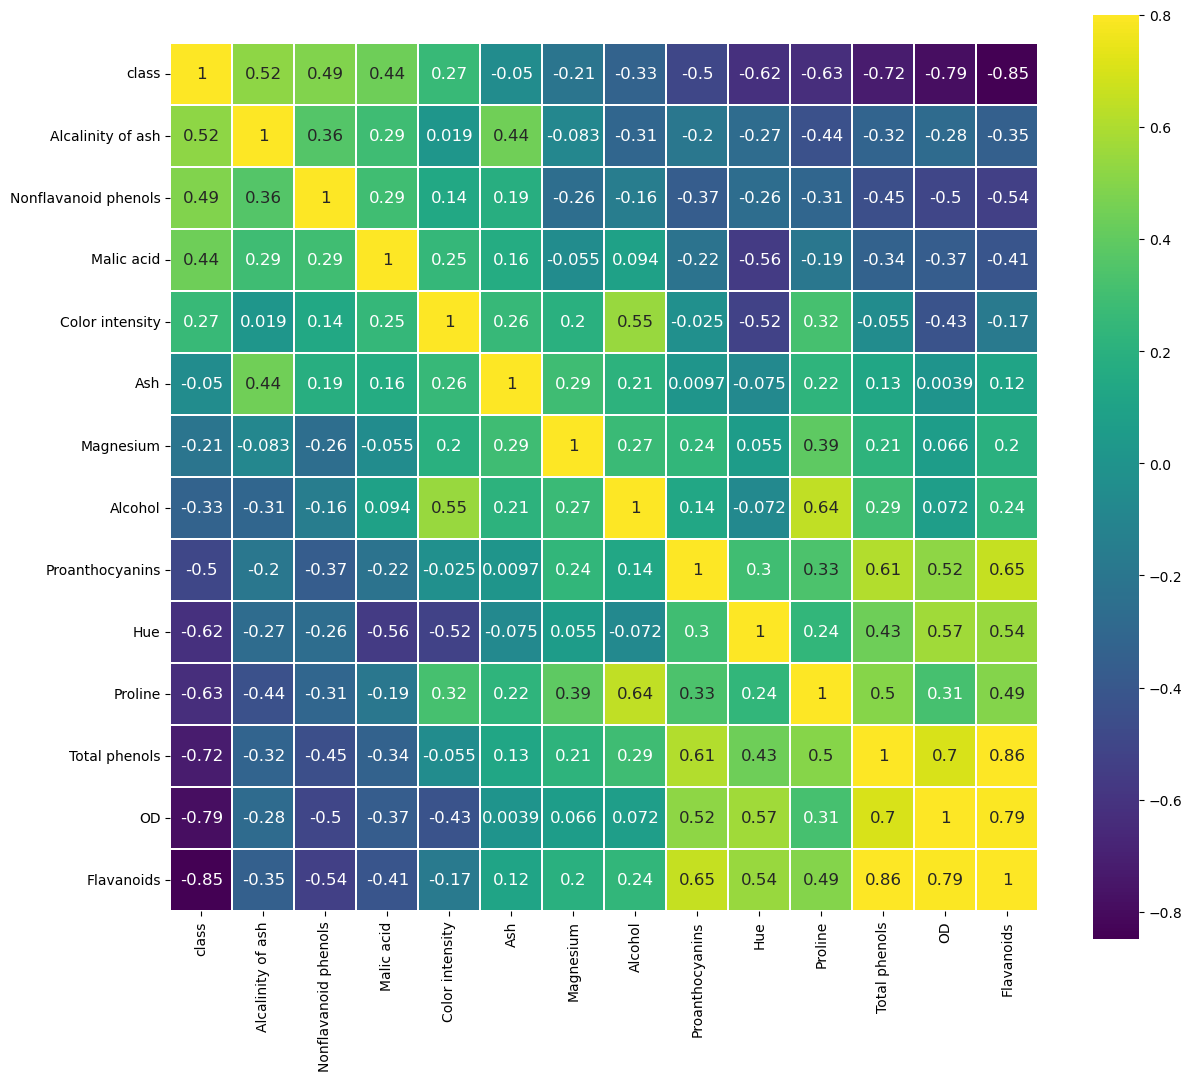

In [11]:
#Ya que hay correlaciones negativas y positivas, cambiamos los colores para una mejor visualización.
k= 14
cols = correlation.nlargest(k,'class')['class'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

| CLASE | CALIDAD DE VINO| 
|-------------|-------------|
| 1   | PRIMERA   | 
| 2   | SEGUNDA   | 
| 3   | TERCERA   | 

<div class="alert alert-success">
    Con el objetivo de ver las correlaciones más altas que tienen las columnas una con una aplicamos la matriz de correlación, en ella podemos notar que las correlaciones positivas más altas son <strong>Flavanoids vs Total phenols, OD vs Flavanoids, OD vs Total phenols, Alcohol vs Color intensity, Nonflavanoid phenols vs class, Acid malic vs class, Alcalinity of ash vs class</strong>, por otro lado, también vemos altas correlaciones negativas, que serían magnitudes que aumentan mientras la otra disminuye y que están altamente relacionadas <strong>Flavanoivds vs class, OD vs class, Total phenols vs class, proline vs class, Alcohol vs class</strong>. Esta información nos dará referencia para el análisis de variables donde usaremos gráficas.
</div>

# <font color=#0C5C84>****3.1 ANÁLISIS UNIVARIADO****<tfont>

## <font color=#C4610E>****3.11 ¿Cuál es la distribución de vinos según su Calidad?****<tfont>

In [12]:
# Mapa de etiquetas para la columna 'class'
etiquetas_clase = {1: 'Vino de Primera', 2: 'Vino de Segunda', 3: 'Vino de Tercera'}
# Obtener la cantidad de datos por clase
cantidadxclase = df['class'].value_counts()
# Crear una nueva columna con las etiquetas descriptivas
cantidadxclase.index = cantidadxclase.index.map(etiquetas_clase)
# Crear el gráfico de pastel con Plotly
fig1 = px.pie(values=cantidadxclase, names=cantidadxclase.index)
# Configurar el título centrado
fig1.update_layout(
    title_text='Distribución según la calidad del vino',
    title_x=0.5,
    title_y=0.95
)
fig1.show()

| CLASE | PORCENTAJE % | NÚMERO DE MUESTRAS |
|-------------|-------------|-------------|
| 1   | 33.1   | 59   |
| 2   | 39.9   | 71   |
| 3   | 27   | 48   |

## <font color=#C4610E>****3.12 ¿Cuál es la distribución de alcohol en los vinos?****<tfont>

In [13]:
# Histograma de la cantidad de alcohol presente en las muestras de vino
fig_hist1 = px.histogram(df, x='Alcohol', nbins=35, title='Histograma de Alcohol', color_discrete_sequence=['green'])

fig_hist1.update_layout(
    title_text='Distribución de los vinos seǵun su contenido de alcohol',  
    title_x=0.5,  
    title_y=0.95,  
    xaxis_title='Contenido de Alcohol %/vol',  
    yaxis_title='Conteo de Muestras',  
    bargap=0.1,  
    bargroupgap=0.1, 
    showlegend=False,  
    template='plotly_white'  
)
# Añadir detalles en las etiquetas de los ejes
fig_hist1.update_xaxes(tickfont=dict(size=12))
fig_hist1.update_yaxes(tickfont=dict(size=12))

fig_hist1.show()

<div class="alert alert-success">
    Vemos que destaca los vino con alcohol entre <strong>12.2 y 12.39 en porcentaje de volumen</strong>, por otro lado, también nos damos cuenta que son solo uno la muestra de vino con mucho o menos alcohol. También existen rangos de alcohol en el que no tenemos muestras, por ejemplo 0 muestras en alcohol de 11.2 - 11.39 y tampoco en 14.4-14.59
</div>

| RANGO DE ALCOHOL %/vol | CANTIDAD | 
|-------------|-------------|
| 11 - 11.19   | 1  | 
| 11.20 - 11.39   | 0   | 
| 11.40 - 11.59   | 4   | 
| 11.60 - 11.79   |   7 | 
| 11.80 - 11.99   | 7   | 
| 12.00 - 12.19   | 12   | 
| 12.20 - 12.39   | 20   | 
| 12.40 - 12.59   | 11   | 
| 12.60 - 12.79   | 12   | 
| 12.80 - 12.99   | 12   |
| 13.00 - 13.19   | 15   |
| 13.20 - 13.39   | 12   |
| 13.40 - 13.59   | 16   |
| 13.60 - 13.79   | 16   |
| 13.80 - 13.99   | 11   |
| 14.00 - 14.19   | 9   |
| 14.20 - 14.39   | 11   |
| 14.40 - 14.59   | 0   |
| 14.60 - 14.79   | 1   |
| 14.80 - 14.99   | 1   |

## <font color=#C4610E>****3.13 ¿Cuál es la distribución del ácido málico en los vinos?****<tfont>

In [14]:
# Histograma de la cantidad de alcohol presente en las muestras de vino
fig_hist2 = px.histogram(df, x='Malic acid', nbins=35, title='Histograma del ácido málico', color_discrete_sequence=['red'])

fig_hist2.update_layout(
    title_text='Distribución del ácido málico en los vinos',  
    title_x=0.5,  
    title_y=0.95,  
    xaxis_title='Contenido de ácido málico %/vol',  
    yaxis_title='Conteo de Muestras',  
    bargap=0.1,  
    bargroupgap=0.1, 
    showlegend=False,  
    template='plotly_white'  
)
# Añadir detalles en las etiquetas de los ejes
fig_hist2.update_xaxes(tickfont=dict(size=12))
fig_hist2.update_yaxes(tickfont=dict(size=12))

fig_hist2.show()

<div class="alert alert-success">
    De la gráfica podemos destacar que hay 60 muestras de vino en <strong>1.5 - 1.89 %/vol de ácido málico</strong>, esto representa el 33.7% de todas las muestras , por otro lado, el comportamiento de la gráfico es campana a la izquierda, es decir, la mayor parte de los vinos son con ácido málico intermedio, no muy altos ni bajos. Esto sin duda se debe a parámetros de calidad y control para vinos, los valores deben encontrarse entre esos rangos.
</div>

## <font color=#C4610E>****3.14 ¿Cuál es la distribución de la intensidad de color en los vinos?****<tfont>

In [15]:
# Histograma de la cantidad de alcohol presente en las muestras de vino
fig_hist3 = px.histogram(df, x='Color intensity', nbins=35, title='Histograma de la distribución del color', color_discrete_sequence=['purple'])

fig_hist3.update_layout(
    title_text='Distribución de la intensidad de color en los vinos',  
    title_x=0.5,  
    title_y=0.95,  
    xaxis_title='Contenido de intensidad g/L',  
    yaxis_title='Conteo de Muestras',  
    bargap=0.1,  
    bargroupgap=0.1, 
    showlegend=False,  
    template='plotly_white'  
)
# Añadir detalles en las etiquetas de los ejes
fig_hist3.update_xaxes(tickfont=dict(size=12))
fig_hist3.update_yaxes(tickfont=dict(size=12))

fig_hist3.show()

<div class="alert alert-success">
    De la gráfica podemos que hay más vinos (19) con una intensidad entre  <strong>5.25-5.74 g/L</strong>, también se trata de una campana hacia la izquierda, los datos están centralizados en su mayoria, por los extremos hay pocas muestras de vino con altas o bajas intensidades de color. Tambien hay rangos donde no hay muestras, por ejemplo:<strong>11.25-11.74 y 12.25-12.74L</strong>.
</div>

# <font color=#0C5C84>****3.2 ANÁLISIS BIVARIADO****<tfont>

## <font color=#C4610E>****3.21 ¿Qué relación guarda la calidad del vino con la cantidad de alcohol presentes?****<tfont>

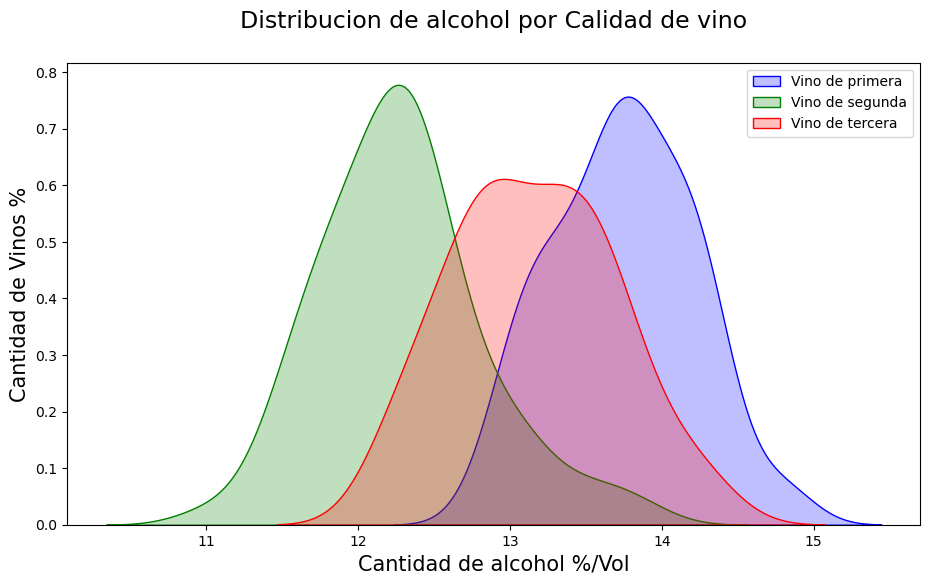

In [16]:
plt.figure(figsize=(11,6))
sns.kdeplot(data=df[df['class']==1], x='Alcohol', color='blue',shade=True)
sns.kdeplot(data=df[df['class']==2], x='Alcohol', color='green',shade=True)
sns.kdeplot(data=df[df['class']==3], x='Alcohol', color='red',shade=True)
plt.ylabel('Cantidad de Vinos %', fontsize=15)
plt.xlabel('Cantidad de alcohol %/Vol', fontsize=15)
plt.legend(['Vino de primera','Vino de segunda', 'Vino de tercera'])
plt.title('Distribucion de alcohol por Calidad de vino\n', fontsize=17)
plt.show()

<div class="alert alert-success">
    En resumen, el gráfico representa las distribuciones de la cantidad de alcohol en los 3 tipos de vino(Vino de primera, Vino de segunda y Vino de tercera) en un solo gráfico, lo que permite comparar visualmente las distribuciones de alcohol entre los distintos tipos de vinos. Notamos que el vino de primera tiene la tasa más alta de alcohol, la de 3ra calidad está entre la parte intermedia, la mayoría se ubica en 13%/vol, luego la de segunda calidad, que tiene la mayoria de los vinos en 12%/vol.

## <font color=#C4610E>****3.22 ¿Cómo se relaciona el promedio de OD con las clases de vino?****<tfont>

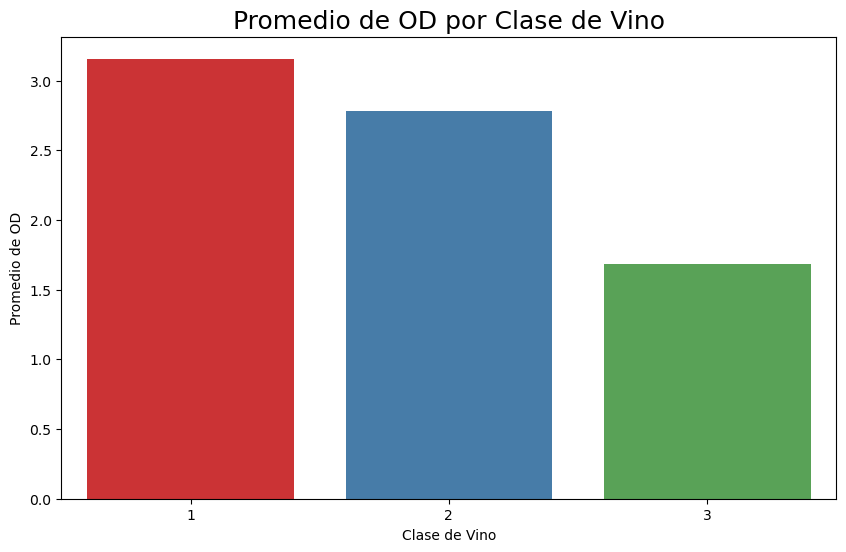

In [17]:
# Calcula el promedio de Proline para cada clase de vino
promedio_proline = df.groupby("class")["OD"].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.title("Promedio de OD por Clase de Vino", fontsize=18)

# Utiliza un gráfico de barras para representar el promedio de Proline para cada clase de vino
c = sns.barplot(x="class", y="OD", data=promedio_proline, palette="Set1")

plt.xlabel("Clase de Vino")
plt.ylabel("Promedio de OD")
plt.show()

<div class="alert alert-success">
    Tal como se había indicado, la característica OD es muy importante en los vinos, de este parámetro se puede definir la calidad de vino, siendo que el vino de primera calidad tiene alta concentración de oxígeno disuelto, lo que indica su calidad en su preparado.
</div>

In [18]:
promedio_ODD = df.groupby("class")["OD"].mean().reset_index()

# Crear la gráfica de barras con Plotly Express
fig_bar1 = px.bar(promedio_ODD, x="class", y="OD", title="Promedio de OD por Clase de Vino",
                 color_discrete_sequence=px.colors.qualitative.Set1)
fig_bar1.update_layout(
    xaxis_title="Clase de Vino",
    yaxis_title="Promedio de Oxígeno Disuelto",
)

# Mostrar la gráfica
fig_bar1.show()

## <font color=#C4610E>****3.23 ¿Cómo se relaciona el promedio de Alcohol con las clases de vino?****<tfont>

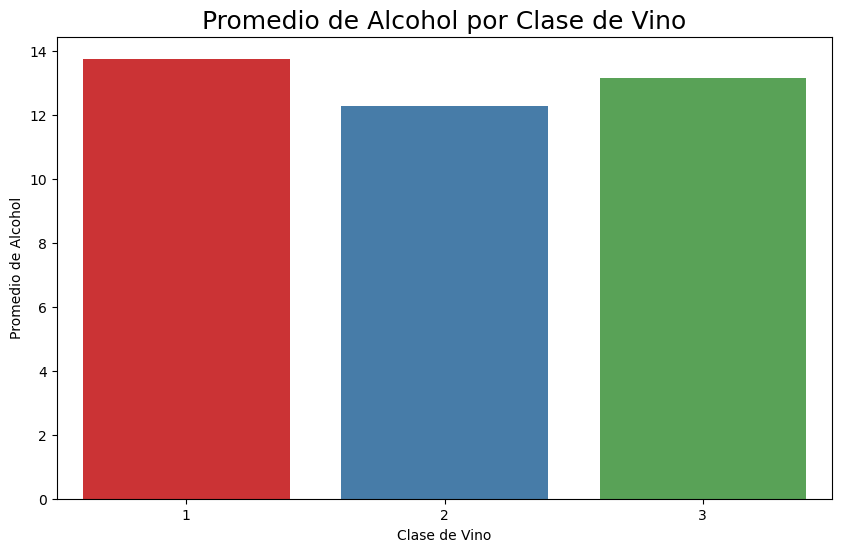

In [19]:
# Calcula el promedio de Proline para cada clase de vino
promedio_alcohol = df.groupby("class")["Alcohol"].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.title("Promedio de Alcohol por Clase de Vino", fontsize=18)

# Utiliza un gráfico de barras para representar el promedio de Proline para cada clase de vino
c = sns.barplot(x="class", y="Alcohol", data=promedio_alcohol, palette="Set1")

plt.xlabel("Clase de Vino")
plt.ylabel("Promedio de Alcohol")
plt.show()

<div class="alert alert-success">
    Notamos que la cantidad de alcohol presente no es determinante para la calidad del vino, pero aún así se sabe que el de la primera calidad tiene alto alta concentración de alcohol.
</div>

## <font color=#C4610E>****3.24 ¿Cómo se relaciona el promedio de Total phenols con las clases de vino?****<tfont>

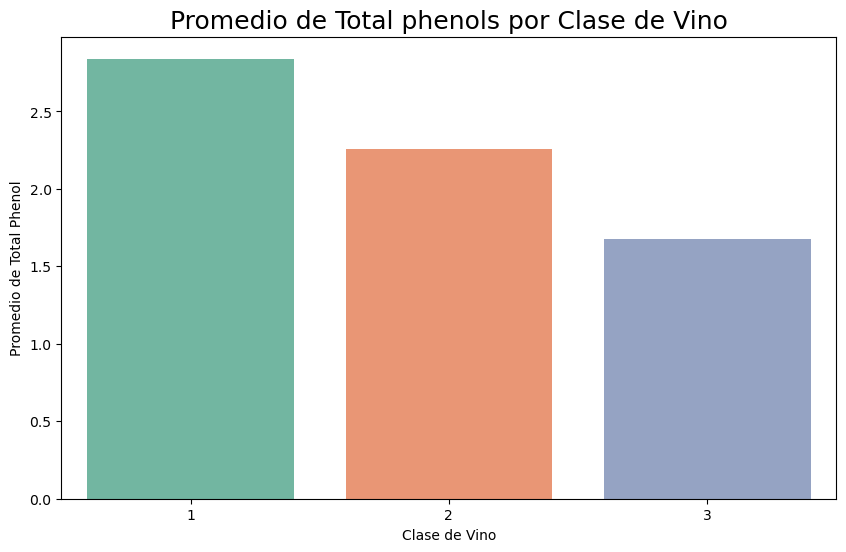

In [20]:
# Calcula el promedio de Proline para cada clase de vino
promedio_fenol = df.groupby("class")["Total phenols"].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.title("Promedio de Total phenols por Clase de Vino", fontsize=18)

# Utiliza un gráfico de barras para representar el promedio de Proline para cada clase de vino
c = sns.barplot(x="class", y="Total phenols", data=promedio_fenol, palette="Set2")

plt.xlabel("Clase de Vino")
plt.ylabel("Promedio de Total Phenol")
plt.show()

<div class="alert alert-success">
    La cantidad de phenoles disueltos en el vino en importante porque influye en el color, sabor y estabilidad del vino. Por ello notamos que el de la 1ra calidad tiene alta concentración de phenoles.
</div>

## <font color=#C4610E>****3.25 ¿Los TOP 10 vinos con más alcohol?****<tfont>

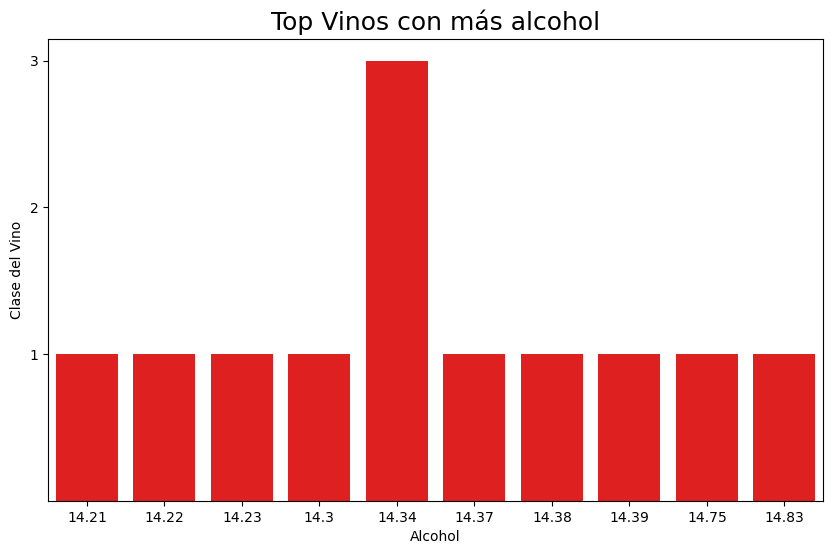

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los 10 vinos con mayor cantidad de alcohol
top_10_alcohol = df.sort_values(by="Alcohol", ascending=False)[:12]

plt.figure(figsize=(10, 6))
plt.title("Top Vinos con más alcohol", fontsize=18)

c = sns.barplot(x=top_10_alcohol["Alcohol"], y=top_10_alcohol["class"], color="red")

plt.xlabel("Alcohol")
plt.ylabel("Clase del Vino")

plt.yticks(range(1, 4))

plt.show()

<div class="alert alert-success">
    Hacemos una muestra final de los 10 mejores vinos respecto a su cantidad de alcohol, simpre resalta el de la primera calidad. Salvo en el puesto 6 destaca un vino de 3ra calidad.
</div>

## <font color=#C4610E>****3.26 ¿Relación de fenoles y flavonoides?****<tfont>

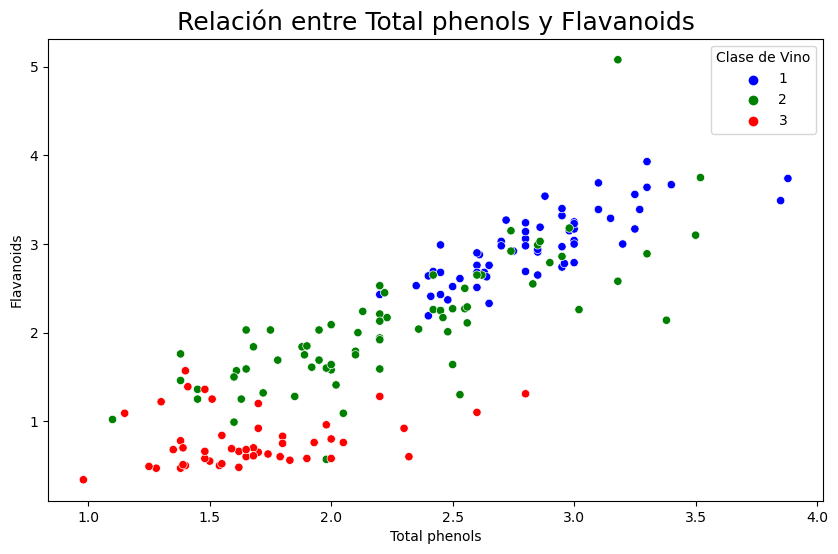

In [22]:
color_map = {1: 'blue',2: 'green',3: 'red'}

plt.figure(figsize=(10, 6))
plt.title("Relación entre Total phenols y Flavanoids", fontsize=18)

# Utilizar un gráfico de dispersión para relacionar las columnas "Total phenols" y "Flavanoids"
c = sns.scatterplot(x='Total phenols', y='Flavanoids', data=df, hue='class', palette=color_map)

plt.xlabel("Total phenols")
plt.ylabel("Flavanoids")
plt.legend(title="Clase de Vino")
plt.show()

<div class="alert alert-success">
   Observamos que cuando hay baja cantidad de flavonoides y fenoles el vino es de clase 3, y conforme estos aumentan cambia a clase 2, los vinos con mayor cantidad de flavonoides y fenoles son clase 1
</div>

## <font color=#C4610E>****3.27 ¿Relación entre Hue y OD?****<tfont>

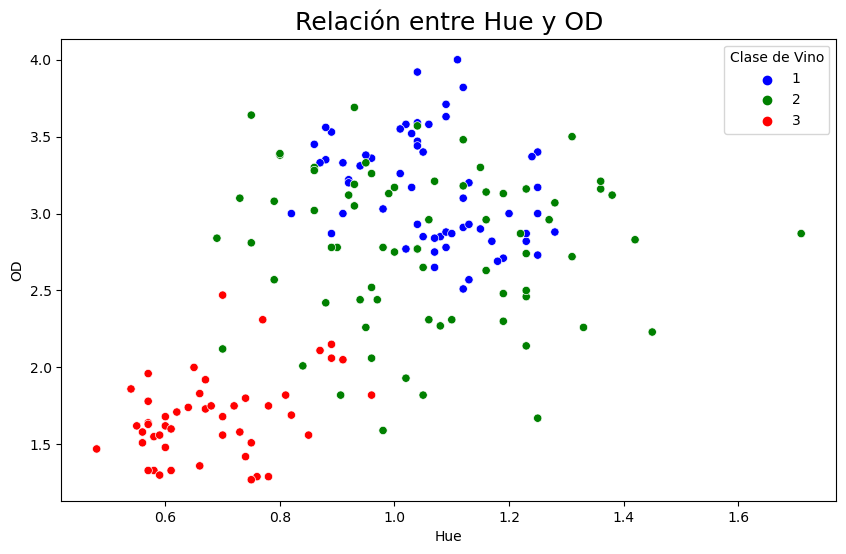

In [23]:
color_map = {1: 'blue',2: 'green',3: 'red'}

plt.figure(figsize=(10, 6))
plt.title("Relación entre Hue y OD", fontsize=18)

# Utilizar un gráfico de dispersión para relacionar las columnas "Total phenols" y "Flavanoids"
c = sns.scatterplot(x='Hue', y='OD', data=df, hue='class', palette=color_map)

plt.xlabel("Hue")
plt.ylabel("OD")
plt.legend(title="Clase de Vino")
plt.show()

<div class="alert alert-success">
 Se nota la diferencia en la calidad del vino, un vino de calidad tiene alto OD, de igual manera, el vino de 3ra calidad tiene bajo OD y bajo Hue
</div>

## <font color=#C4610E>****3.28 ¿Relación entre OD (oxígeno disuelto) y flavonoides?****<tfont>

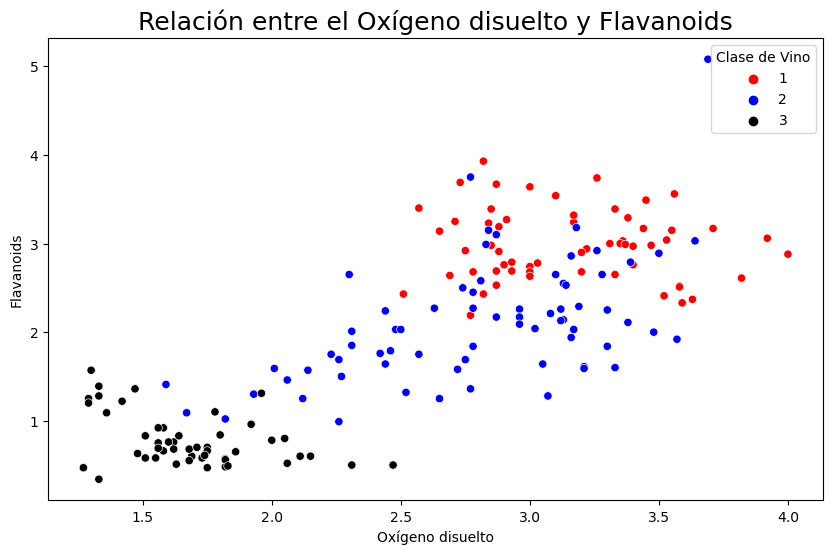

In [24]:
color_map = {1: 'red', 2: 'blue',3: 'black'}

plt.figure(figsize=(10, 6))
plt.title("Relación entre el Oxígeno disuelto y Flavanoids", fontsize=18)

# Utilizar un gráfico de dispersión para relacionar las columnas "Total phenols" y "Flavanoids"
c = sns.scatterplot(x='OD', y='Flavanoids', data=df, hue='class', palette=color_map)

plt.xlabel("Oxígeno disuelto")
plt.ylabel("Flavanoids")
plt.legend(title="Clase de Vino")
plt.show()

<div class="alert alert-success">
Los vinos de primera tienen altos valores en Flavanoids y OD a difirencia de los de madiana y baja calidad. 
</div>

# <font color=#0C5C84>****4. PREPARACIÓN DE DATOS****<tfont>

### Guardamos la columna `class` en variable `y`para verificar el aprendizaje del modelo

In [25]:
y=df[df.columns[-14]].to_numpy()
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

### Eliminamos la columna class

In [26]:
Wine=df.drop(["class"], axis=1)
Wine

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

       OD  Proline  
0    3.92     1065  
1    3.40     1050  
2    3.17     1185  
3    3.45     1480  
4    2.93      735  
..    ...      ...  
173  1.74      740  
174  1.56      750  
175  1.56      835  
176  1.62      840  
177  1.60      560  

[178 rows x 13 columns]

# <font color=#0C5C84>****4.0 Matriz de confusión****<tfont>

In [27]:
from sklearn.tree import DecisionTreeClassifier     
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import confusion_matrix
model=DecisionTreeClassifier(criterion="gini",max_depth=3) 

In [28]:
model_train=model.fit(Wine,y)

<function matplotlib.pyplot.show(close=None, block=None)>

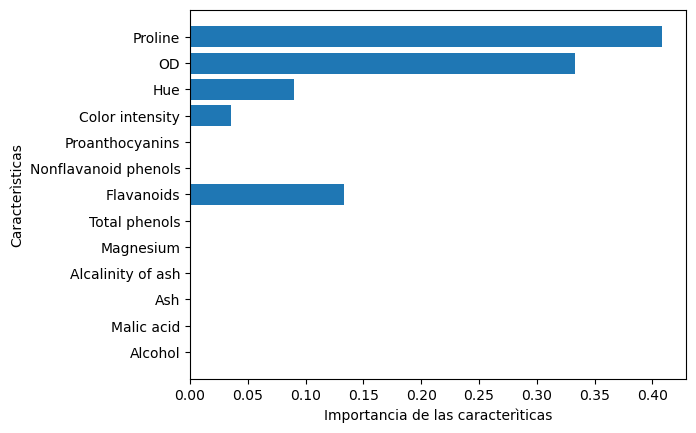

In [29]:
from sklearn.model_selection import train_test_split
caract=Wine.shape[1]
plt.barh(range(caract),model_train.feature_importances_)
plt.yticks(np.arange(caract),('Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'OD', 'Proline'))
plt.xlabel("Importancia de las caracterìticas")
plt.ylabel("Caracterìsticas")
plt.show

<div class="alert alert-success">
Vemos que proline, OD, Hue tienen más relación
</div>

**Aqui se puede normalizar los datos para un mejor análisis**

In [30]:

# Paso 1: Normalización
min_max_scaler = MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(Wine)
Wine_n = pd.DataFrame(data_normalized, columns=Wine.columns)

# Paso 2: Estandarización
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(Wine)
Wine_st = pd.DataFrame(data_standardized, columns=Wine.columns)

# Paso 3: Escalado
# Puedes utilizar el mismo objeto MinMaxScaler ya que ya se ajustó en el paso 1
data_scaled = min_max_scaler.transform(Wine)
Wine_sc = pd.DataFrame(data_scaled, columns=Wine.columns)

# Paso 4: Normalización L2
normalizer = Normalizer()
data_normalized_l2 = normalizer.fit_transform(Wine)
Wine_l2 = pd.DataFrame(data_normalized_l2, columns=Wine.columns)

# Imprime los DataFrames resultantes
print("Wine (Original):")
Wine.head()
print("\nWine_n (Normalized):")
Wine_n.head()
print("\nWine_st (Standardized):")
Wine_st.head()
print("\nWine_sc (Scaled):")
Wine_sc.head()
print("\nWine_l2 (Normalized L2):")
Wine_l2.head()

Wine (Original):

Wine_n (Normalized):

Wine_st (Standardized):

Wine_sc (Scaled):

Wine_l2 (Normalized L2):


Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0  0.013264    0.001594  0.002265           0.014542   0.118383   
1  0.012513    0.001687  0.002029           0.010617   0.094794   
2  0.011063    0.001984  0.002245           0.015636   0.084906   
3  0.009680    0.001314  0.001684           0.011317   0.076119   
4  0.017775    0.003477  0.003853           0.028193   0.158418   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0       0.002610    0.002852              0.000261         0.002135   
1       0.002512    0.002616              0.000246         0.001213   
2       0.002354    0.002724              0.000252         0.002362   
3       0.002593    0.002351              0.000162         0.001468   
4       0.003759    0.003611              0.000524         0.002443   

   Color intensity       Hue        OD   Proline  
0         0.005257  0.000969  0.003654  0.992738  
1         0.004152  0.000995  0.003223  0.995336  
2         0.004775  0.000866  0.002665  0.996176  
3         0.005254  0.000579  0.002324  0.996961  
4         0.005800  0.001396  0.003934  0.986753

In [31]:
from sklearn.manifold import Isomap

# Paso 1: Normalización
min_max_scaler = MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(Wine)
Wine_n = pd.DataFrame(data_normalized, columns=Wine.columns)

# Paso 2: Estandarización
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(Wine)
Wine_st = pd.DataFrame(data_standardized, columns=Wine.columns)

# Paso 3: Escalado
# Puedes utilizar el mismo objeto MinMaxScaler ya que ya se ajustó en el paso 1
data_scaled = min_max_scaler.transform(Wine)
Wine_sc = pd.DataFrame(data_scaled, columns=Wine.columns)

# Paso 4: Normalización L2
normalizer = Normalizer()
data_normalized_l2 = normalizer.fit_transform(Wine)
Wine_l2 = pd.DataFrame(data_normalized_l2, columns=Wine.columns)

# Paso 5: Isomap
isomap = Isomap(n_components=2)
isomap_Wine_n = isomap.fit_transform(Wine_n)
isomap_Wine_st = isomap.fit_transform(Wine_st)
isomap_Wine_sc = isomap.fit_transform(Wine_sc)
isomap_Wine_l2 = isomap.fit_transform(Wine_l2)


# <font color=#0C5C84>****5. MÉTODOS DE PREDICCION USADOS EN K-MEANS****<tfont>

## <font color=#C4610E>****5.1 NORMALIZACIÓN****<tfont>

In [32]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Wine_n)
    wcss.append(kmeans.inertia_)

Graficamos los resultados **WCSS** para formar el Codo de Jambú

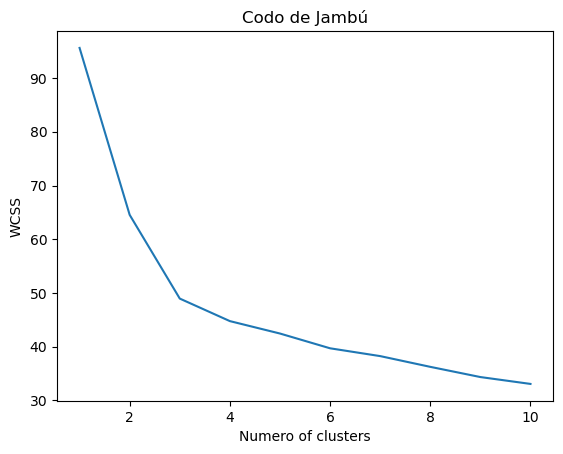

In [33]:
plt.plot(range(1, 11), wcss)
plt.title('Codo de Jambú')
plt.xlabel('Numero of clusters')
plt.ylabel('WCSS')
plt.show()

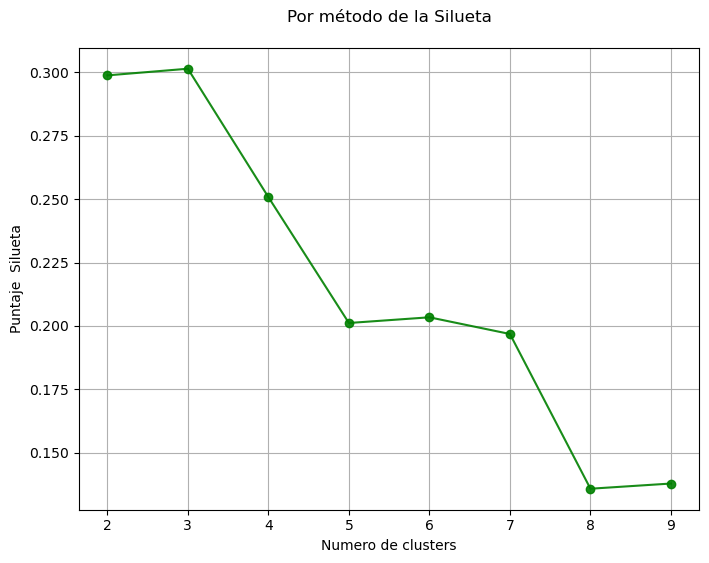

In [34]:
n_clusters=10
scores = []
for n in range(2, n_clusters):
    kmeans=KMeans(n_clusters=n)
    kmeans.fit(Wine_n)
    labels = kmeans.labels_
    scores.append(silhouette_score(Wine_n,labels, metric='euclidean'))

plt.figure(figsize=(8,6))
plt.plot(range(2,n_clusters), scores, marker='o', color='green', alpha=0.9)
plt.xlabel('Numero de clusters')
plt.ylabel('Puntaje  Silueta')
plt.title('Por método de la Silueta\n')
plt.grid()
plt.show()

<div class="alert alert-success">
Según los codos de jambu, puede ser 3, pero con el método de la silueta el valor sería 3 klusters.
</div>

## <font color=#0E0EC4>Aplicamos el modelo KMeans a la base de datos<tfont>

In [35]:
clustering=KMeans(n_clusters = 3)
clustering.fit(Wine_n)

KMeans(n_clusters=3)

## <font color=#0E0EC4>Agregamos la clasificación al archivo original<tfont>

In [36]:
Wine["KMeans_Cluster"]=clustering.labels_
Wine.head()

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

     OD  Proline  KMeans_Cluster  
0  3.92     1065               2  
1  3.40     1050               2  
2  3.17     1185               2  
3  3.45     1480               2  
4  2.93      735               2

In [37]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_Wine=pca.fit_transform(Wine_n)
pca_Wine_df=pd.DataFrame(data=pca_Wine, columns = ["Componente_1", "Componente_2"])
pca_nombre_Wine=pd.concat([pca_Wine_df, Wine[["KMeans_Cluster"]]], axis=1)

pca_nombre_Wine

Componente_1  Componente_2  KMeans_Cluster
0       -0.706336     -0.253193               2
1       -0.484977     -0.008823               2
2       -0.521172     -0.189187               2
3       -0.821644     -0.580906               2
4       -0.202546     -0.059467               2
..            ...           ...             ...
173      0.739510     -0.471901               1
174      0.581781     -0.348366               1
175      0.626313     -0.546857               1
176      0.572991     -0.425516               1
177      0.701764     -0.513505               1

[178 rows x 3 columns]

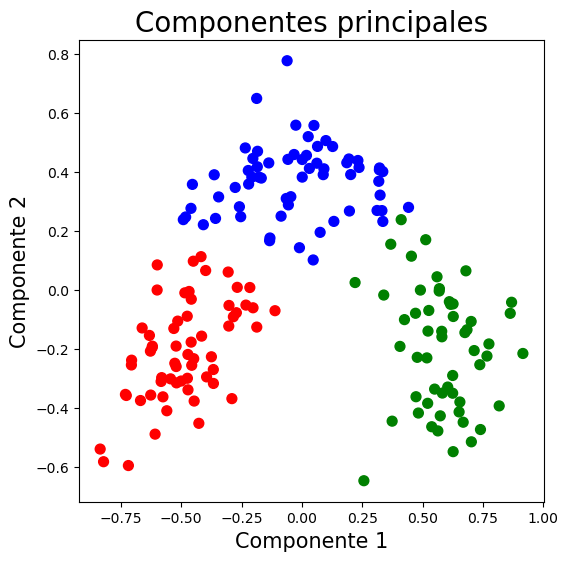

In [38]:
fig = plt.figure(figsize = (6,6))

ax= fig.add_subplot(1,1,1)
ax.set_xlabel("Componente 1", fontsize= 15)
ax.set_ylabel("Componente 2", fontsize = 15)
ax.set_title("Componentes principales", fontsize = 20)

color_theme = np.array(['blue', 'green',"red","black"])
ax.scatter(x = pca_nombre_Wine.Componente_1, y = pca_nombre_Wine.Componente_2, 
           c=color_theme[pca_nombre_Wine.KMeans_Cluster], s = 50)
plt.show()

In [39]:
predicciones=clustering.labels_
predicciones

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [40]:
from sklearn import metrics
score=metrics.adjusted_rand_score(y,predicciones)
score

0.8685425493202144

## <font color=#C4610E>****5.2 ESCALADO****<tfont>

In [41]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Wine_sc)
    wcss.append(kmeans.inertia_)

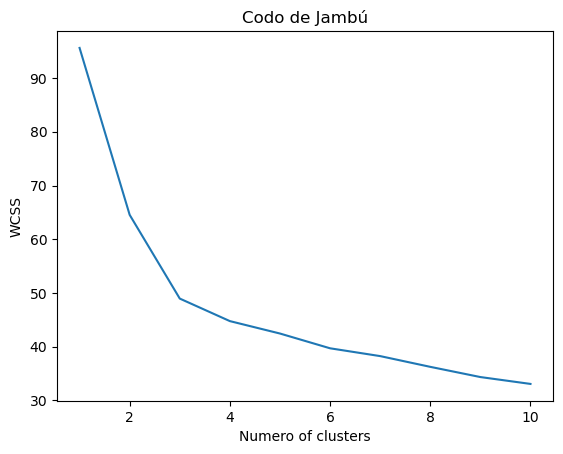

In [42]:
plt.plot(range(1, 11), wcss)
plt.title('Codo de Jambú')
plt.xlabel('Numero of clusters')
plt.ylabel('WCSS')
plt.show()

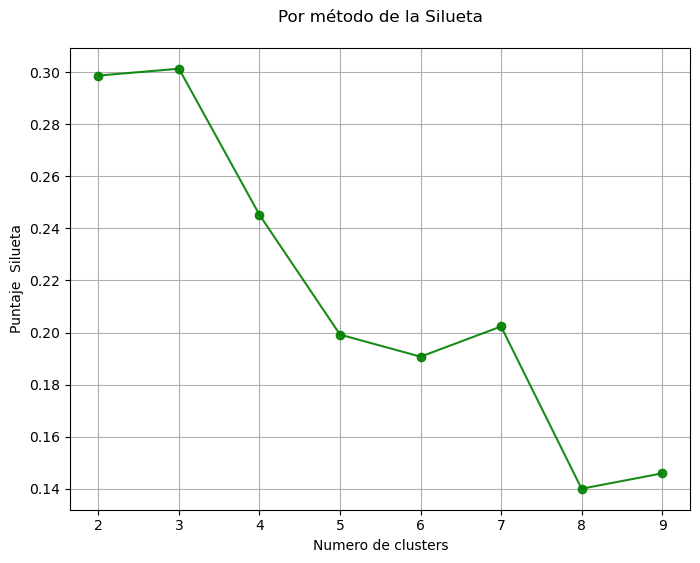

In [43]:
n_clusters=10
scores = []
for n in range(2, n_clusters):
    kmeans=KMeans(n_clusters=n)
    kmeans.fit(Wine_sc)
    labels = kmeans.labels_
    scores.append(silhouette_score(Wine_sc,labels, metric='euclidean'))

plt.figure(figsize=(8,6))
plt.plot(range(2,n_clusters), scores, marker='o', color='green', alpha=0.9)
plt.xlabel('Numero de clusters')
plt.ylabel('Puntaje  Silueta')
plt.title('Por método de la Silueta\n')
plt.grid()
plt.show()

In [44]:
clustering=KMeans(n_clusters = 3)
clustering.fit(Wine_sc)

KMeans(n_clusters=3)

In [45]:
Wine["KMeans_Cluster"]=clustering.labels_

In [46]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_Wine=pca.fit_transform(Wine_sc)
pca_Wine_df=pd.DataFrame(data=pca_Wine, columns = ["Componente_1", "Componente_2"])
pca_nombre_Wine=pd.concat([pca_Wine_df, Wine[["KMeans_Cluster"]]], axis=1)

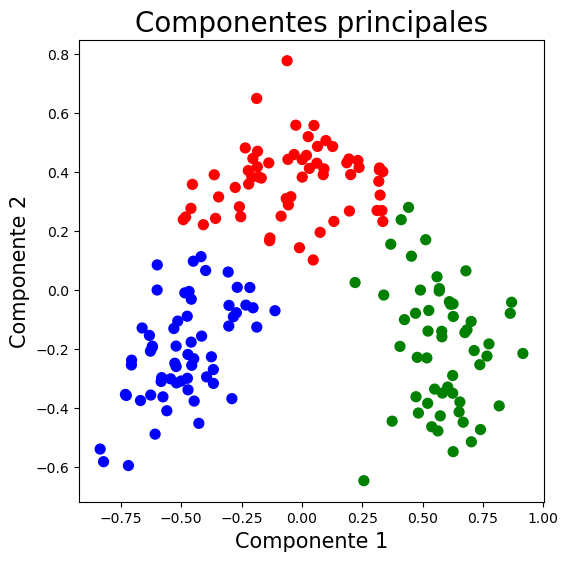

In [47]:
fig = plt.figure(figsize = (6,6))

ax= fig.add_subplot(1,1,1)
ax.set_xlabel("Componente 1", fontsize= 15)
ax.set_ylabel("Componente 2", fontsize = 15)
ax.set_title("Componentes principales", fontsize = 20)

color_theme = np.array(['blue', 'green',"red"])
ax.scatter(x = pca_nombre_Wine.Componente_1, y = pca_nombre_Wine.Componente_2, 
           c=color_theme[pca_nombre_Wine.KMeans_Cluster], s = 50)

In [48]:
predicciones=clustering.labels_
predicciones

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [49]:
from sklearn import metrics
score2=metrics.adjusted_rand_score(y,predicciones)
score2

0.8536602842727952

## <font color=#C4610E>****5.3 ESTANDARIZADO****<tfont>


In [50]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Wine_st)
    wcss.append(kmeans.inertia_)

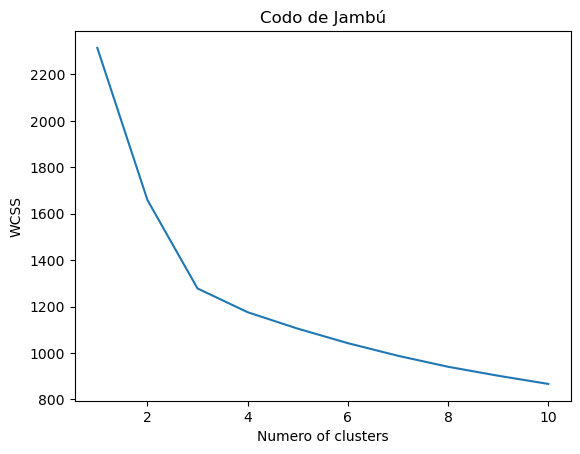

In [51]:
plt.plot(range(1, 11), wcss)
plt.title('Codo de Jambú')
plt.xlabel('Numero of clusters')
plt.ylabel('WCSS')
plt.show()

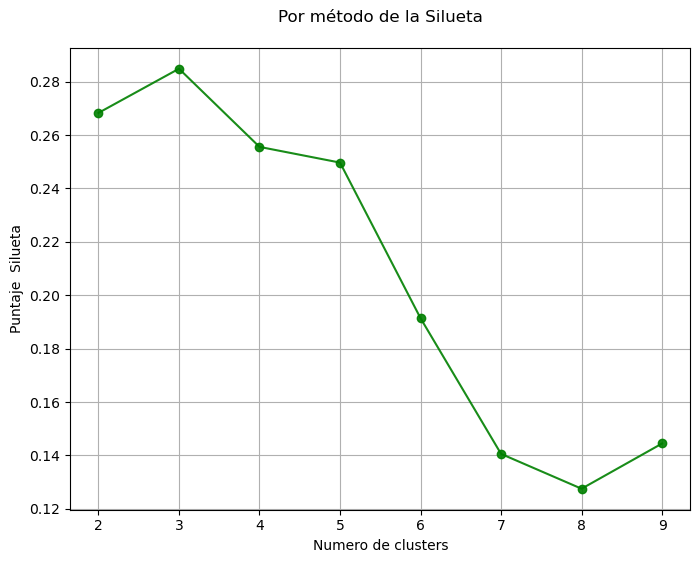

In [52]:
n_clusters=10
scores = []
for n in range(2, n_clusters):
    kmeans=KMeans(n_clusters=n)
    kmeans.fit(Wine_st)
    labels = kmeans.labels_
    scores.append(silhouette_score(Wine_st,labels, metric='euclidean'))

plt.figure(figsize=(8,6))
plt.plot(range(2,n_clusters), scores, marker='o', color='green', alpha=0.9)
plt.xlabel('Numero de clusters')
plt.ylabel('Puntaje  Silueta')
plt.title('Por método de la Silueta\n')
plt.grid()
plt.show()

In [53]:
clustering=KMeans(n_clusters = 3)
clustering.fit(Wine_st)

KMeans(n_clusters=3)

In [54]:
Wine["KMeans_Cluster"]=clustering.labels_

In [55]:
pca=PCA(n_components=2)
pca_Wine=pca.fit_transform(Wine_st)
pca_Wine_df=pd.DataFrame(data=pca_Wine, columns = ["Componente_1", "Componente_2"])
pca_nombre_Wine=pd.concat([pca_Wine_df, Wine[["KMeans_Cluster"]]], axis=1)

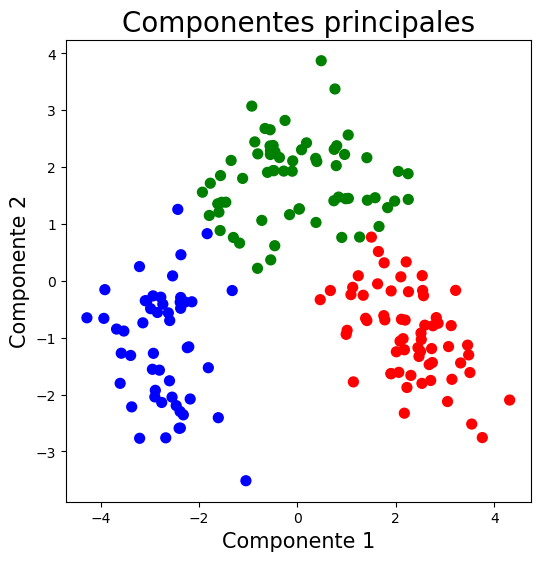

In [56]:
fig = plt.figure(figsize = (6,6))

ax= fig.add_subplot(1,1,1)
ax.set_xlabel("Componente 1", fontsize= 15)
ax.set_ylabel("Componente 2", fontsize = 15)
ax.set_title("Componentes principales", fontsize = 20)

color_theme = np.array(['blue', 'green',"red"])
ax.scatter(x = pca_nombre_Wine.Componente_1, y = pca_nombre_Wine.Componente_2, 
           c=color_theme[pca_nombre_Wine.KMeans_Cluster], s = 50)
plt.show()

In [57]:
predicciones=clustering.labels_
predicciones

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [58]:
score3=metrics.adjusted_rand_score(y,predicciones)
score3

0.8974949815093207

## <font color=#C4610E>****5.4 NORMALIZACIÓN L2****<tfont>


<div class="alert alert-success">
   La normalización L2 (también conocida como normalización euclidiana o normalización por longitud) es una técnica utilizada en el algoritmo K-Means para estandarizar los datos antes de aplicar el algoritmo.
</div>

In [59]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Wine_l2)
    wcss.append(kmeans.inertia_)

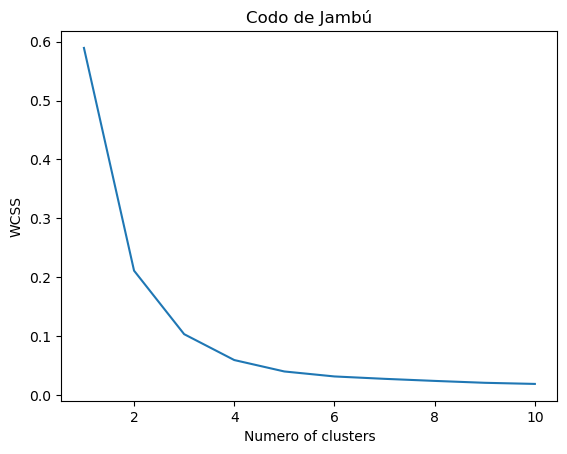

In [60]:
plt.plot(range(1, 11), wcss)
plt.title('Codo de Jambú')
plt.xlabel('Numero of clusters')
plt.ylabel('WCSS')
plt.show()


<div class="alert alert-success">
Según los codos, hay más concavidad en 3 o 2 clusters. Tendiendo más para 3.
</div>

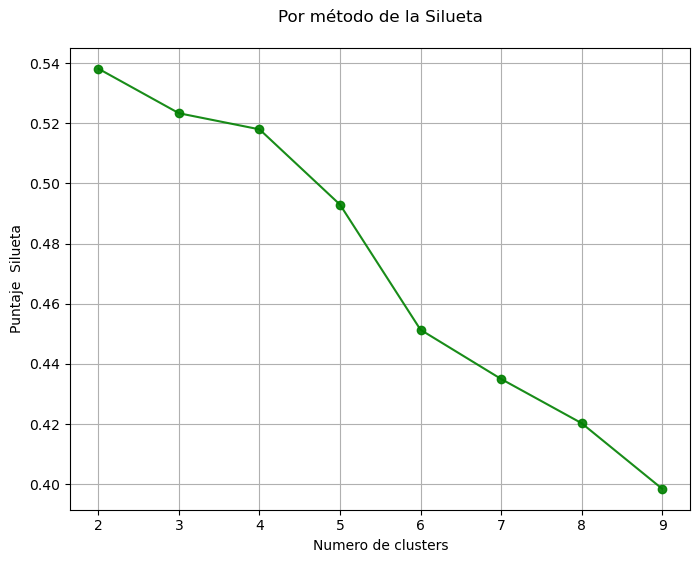

In [61]:
n_clusters=10
scores = []
for n in range(2, n_clusters):
    kmeans=KMeans(n_clusters=n)
    kmeans.fit(Wine_l2)
    labels = kmeans.labels_
    scores.append(silhouette_score(Wine_l2,labels, metric='euclidean'))

plt.figure(figsize=(8,6))
plt.plot(range(2,n_clusters), scores, marker='o', color='green', alpha=0.9)
plt.xlabel('Numero de clusters')
plt.ylabel('Puntaje  Silueta')
plt.title('Por método de la Silueta\n')
plt.grid()
plt.show()


<div class="alert alert-success">
Elegimos 3 clusters debido a que en pruebas anteriores, usando 2 klusters como señala el método de la silueta sale un porcentaje de entre 20% y 25%. Usando 4 clusters, de la misma manera, no es óptimo.
</div>

In [62]:
clustering=KMeans(n_clusters = 3)
clustering.fit(Wine_l2)

KMeans(n_clusters=3)

In [63]:
Wine["KMeans_Cluster"]=clustering.labels_

In [64]:
pca=PCA(n_components=2)
pca_Wine=pca.fit_transform(Wine_l2)
pca_Wine_df=pd.DataFrame(data=pca_Wine, columns = ["Componente_1", "Componente_2"])
pca_nombre_Wine=pd.concat([pca_Wine_df, Wine[["KMeans_Cluster"]]], axis=1)

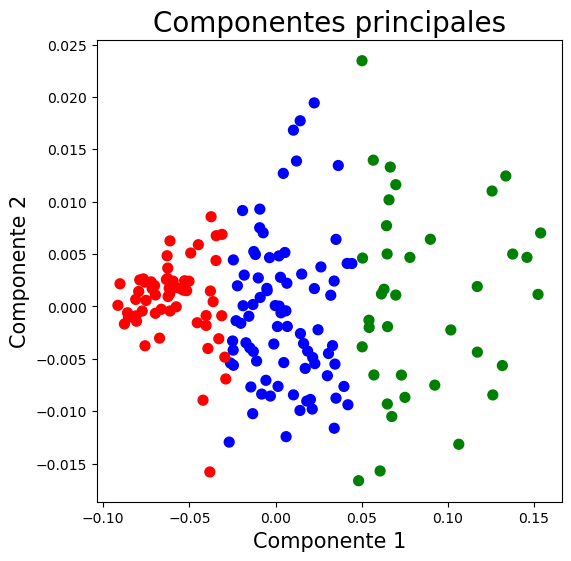

In [65]:
fig = plt.figure(figsize = (6,6))

ax= fig.add_subplot(1,1,1)
ax.set_xlabel("Componente 1", fontsize= 15)
ax.set_ylabel("Componente 2", fontsize = 15)
ax.set_title("Componentes principales", fontsize = 20)

color_theme = np.array(['blue', 'green',"red","purple",'black'])
ax.scatter(x = pca_nombre_Wine.Componente_1, y = pca_nombre_Wine.Componente_2, 
           c=color_theme[pca_nombre_Wine.KMeans_Cluster], s = 50)
plt.show()

In [66]:
predicciones=clustering.labels_
predicciones

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0,
       2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [67]:
score4=metrics.adjusted_rand_score(y,predicciones)
score4

0.3469576379455591

## <font color=#C4610E>****5.5 ISOMAPA****<tfont>


<div class="alert alert-success">
 Es otro método de reducción de dimensionalidad no lineal que se enfoca en preservar las distancias geodésicas entre los puntos en el espacio de datos original, se usan antes de modelado para K.Means.
</div>

In [68]:

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(isomap_Wine_n)
    wcss.append(kmeans.inertia_)

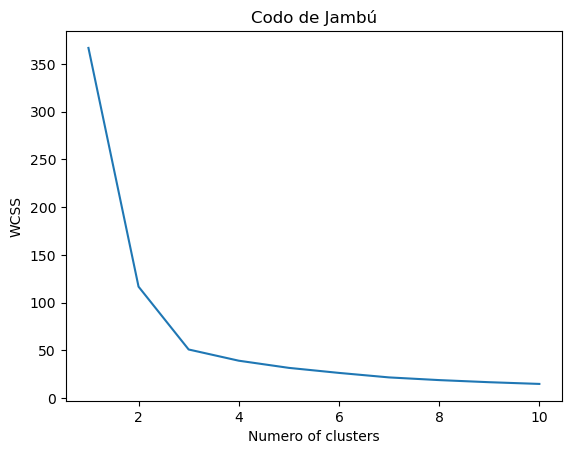

In [69]:
plt.plot(range(1, 11), wcss)
plt.title('Codo de Jambú')
plt.xlabel('Numero of clusters')
plt.ylabel('WCSS')
plt.show()

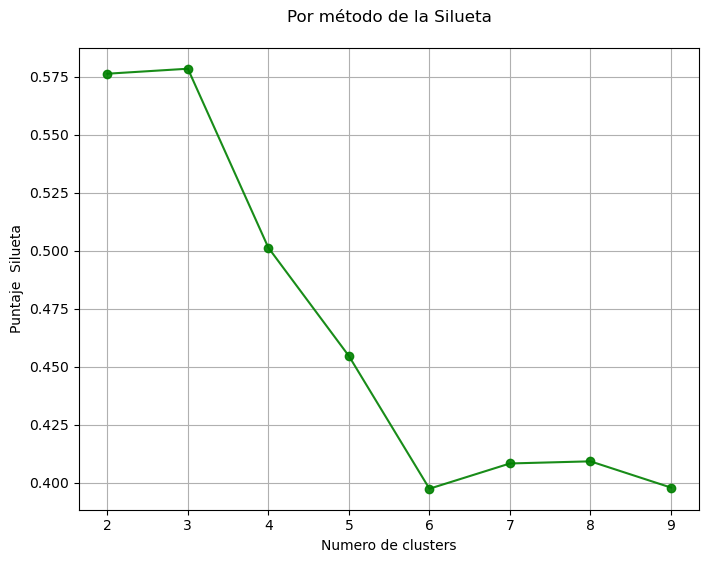

In [70]:
n_clusters=10
scores = []
for n in range(2, n_clusters):
    kmeans=KMeans(n_clusters=n)
    kmeans.fit(isomap_Wine_n)
    labels = kmeans.labels_
    scores.append(silhouette_score(isomap_Wine_n,labels, metric='euclidean'))

plt.figure(figsize=(8,6))
plt.plot(range(2,n_clusters), scores, marker='o', color='green', alpha=0.9)
plt.xlabel('Numero de clusters')
plt.ylabel('Puntaje  Silueta')
plt.title('Por método de la Silueta\n')
plt.grid()
plt.show()

In [71]:
clustering=KMeans(n_clusters = 3)
clustering.fit(isomap_Wine_n)

KMeans(n_clusters=3)

In [72]:
Wine["KMeans_Cluster"]=clustering.labels_
Wine.head()

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

     OD  Proline  KMeans_Cluster  
0  3.92     1065               1  
1  3.40     1050               1  
2  3.17     1185               1  
3  3.45     1480               1  
4  2.93      735               1

In [73]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
isomap_Wine = isomap.fit_transform(Wine_sc)
isomap_Wine_df = pd.DataFrame(data=isomap_Wine, columns=["Componente_1", "Componente_2"])
isomap_nombre_Wine = pd.concat([isomap_Wine_df, Wine[["KMeans_Cluster"]]], axis=1)
isomap_nombre_Wine

Componente_1  Componente_2  KMeans_Cluster
0       -1.581466     -0.031019               1
1       -0.971940      0.430528               1
2       -1.763644      0.400274               1
3       -2.113840      0.328434               1
4       -1.023657      0.193300               1
..            ...           ...             ...
173      1.925333      0.473861               2
174      1.817071      0.119544               2
175      2.179532      0.084428               2
176      2.028441      0.734017               2
177      2.192224      0.189834               2

[178 rows x 3 columns]

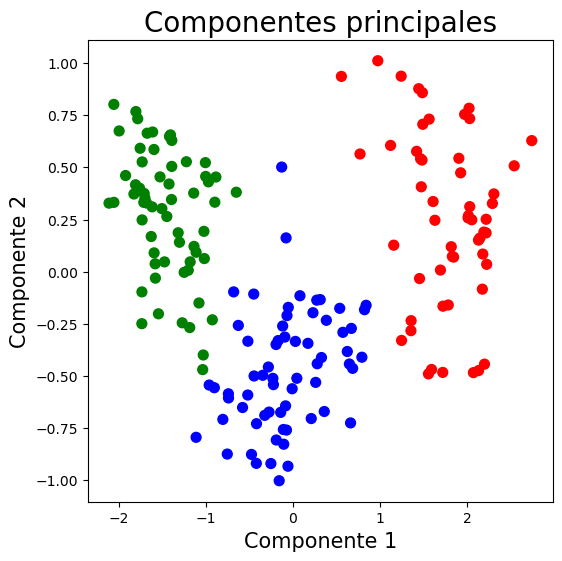

In [74]:
fig = plt.figure(figsize = (6,6))

ax= fig.add_subplot(1,1,1)
ax.set_xlabel("Componente 1", fontsize= 15)
ax.set_ylabel("Componente 2", fontsize = 15)
ax.set_title("Componentes principales", fontsize = 20)

color_theme = np.array(['blue', 'green',"red","black"])
ax.scatter(x = isomap_nombre_Wine.Componente_1, y = isomap_nombre_Wine.Componente_2, 
           c=color_theme[isomap_nombre_Wine.KMeans_Cluster], s = 50)
plt.show()

In [75]:
predicciones=clustering.labels_
predicciones

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [76]:
from sklearn import metrics
score5=metrics.adjusted_rand_score(y,predicciones)
score5

0.8497915802178685

# <font color=#0C5C84>****6. RESULTADOS****<tfont>


<div class="alert alert-success">
Terminado con el modelo k-means mediante 5 métodos, hacemos un resumen de los resultados. 
</div>

In [77]:

# Datos de ejemplo (sustitúyelos con tus propios datos)
modelos = ['NORMALIZACIÓN', 'ESCALADO', 'ESTANDARIZADO',"NORMALIZADO L2","ISOMAP"]
scores = [score*100, score2*100, score3*100, score4*100,score5*100]

# Crear un DataFrame con los datos
modelado = pd.DataFrame({'Model': modelos, 'Valor': scores})
modelado.sort_values(by=['Valor'], ascending=False, inplace=True)
modelado

Model      Valor
2   ESTANDARIZADO  89.749498
0   NORMALIZACIÓN  86.854255
1        ESCALADO  85.366028
4          ISOMAP  84.979158
3  NORMALIZADO L2  34.695764

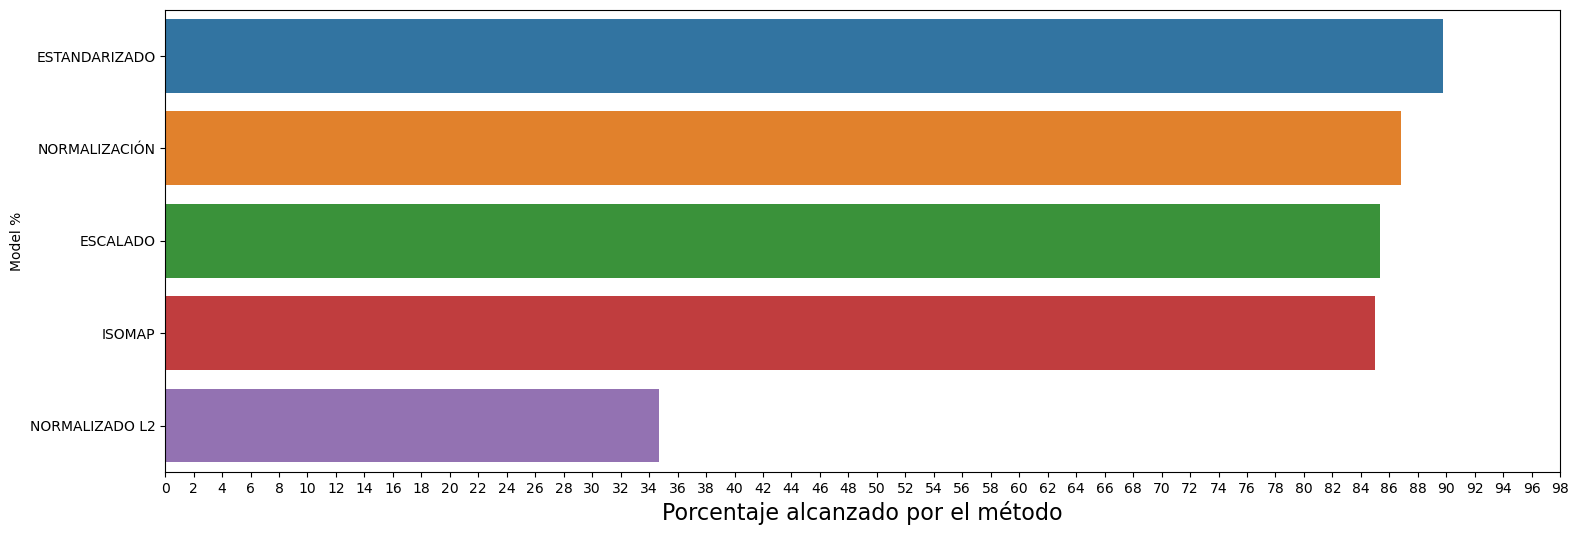

In [78]:
f, axe = plt.subplots(1,1, figsize=(18,6))

modelado.sort_values(by=['Valor'], ascending=False, inplace=True)

sns.barplot(x='Valor', y='Model', data = modelado, ax = axe)
axe.set_xlabel('Porcentaje alcanzado por el método', size=16)
axe.set_ylabel('Model %')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 100, 2))
plt.show()


<div class="alert alert-success">
Presentamos los resultados de la calidad de predicción de los métodos usados en nuestro entrenamiento de datos por K-Means: Siendo el método de estandarizado como el mejor método con un resultado mayor al 89%. y El método de la normalización l2 como el más ineficiente y de menor calidad. está claro que cada método se adapta a los datos del dataset. En nuestro caso, el estandarizado es mejor para la predicción de la calidad de vinos. 
</div>

In [79]:
# Crear el gráfico de barras con Seaborn y Matplotlib
f, axe = plt.subplots(1, 1, figsize=(18, 6))
modelado.sort_values(by=['Valor'], ascending=False, inplace=True)
sns.barplot(x='Valor', y='Model', data=modelado, ax=axe)
axe.set_xlabel('Cross-Validation Score', size=16)
axe.set_ylabel('Model %')
axe.set_xlim(0, 1.0)
axe.set_xticks(np.arange(0, 100, 2))

# Guardar la figura en una imagen
plt.savefig('grafico_modelado.png', bbox_inches='tight')
plt.close()

In [80]:
modelado.sort_values(by=['Valor'], ascending=True, inplace=True)

figf = px.bar(modelado, x='Valor', y='Model', orientation='h',
             labels={'Valor': 'Cross-Validation Score', 'Model': 'Model %'},
             title='Modelado por K-MEANS MÉTODOS USADOS',
             width=700, height=400) 

#para el dash

In [81]:
!pip install dash-bootstrap-components
!pip install dash

In [82]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc


app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    dbc.Row([
        dbc.Col(dcc.Graph(id='fig1', figure=fig1), width=5),
        dbc.Col(dcc.Graph(id='fig_hist1', figure=fig_hist1), width=5),
    ]),
    
    dbc.Row([
        dbc.Col(dcc.Graph(id='fig_hist2', figure=fig_hist2), width=5),
        dbc.Col(dcc.Graph(id='fig_hist3', figure=fig_hist3), width=5),
    ]),
    
    dbc.Row([
        dbc.Col(dcc.Graph(id='fig_bar1', figure=fig_bar1), width=5),
        dbc.Col(dcc.Graph(id='figf', figure=figf), width=5), 
    ]),
])

if __name__ == "__main__":
    app.run_server(debug=True, port=7656)

/tmp/ipykernel_3483/4048222584.py:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

/tmp/ipykernel_3483/4048222584.py:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



http://localhost:7656/

# BIBLIOGRAFÍA

[1] Guía oficial scikit learn https://scikit-learn.org/stable/

[2] Datasets de Scikit Learn: https://scikit-learn.org/stable/datasets/toy_dataset.html

[3] Scikit Learn DecisionTreeClassifier : https://bit.ly/398XAIv

[4] Scikit Learn export_graphviz : https://bit.ly/2ZAbHDt